# Table of Contents
 - Libraries
 - Data Extraction
 - Data Preparation
 - Data standardization
 - SVC RBF Model
 - Classification Function
 - k-Nearest Neighbors (k-NN)
 - Naive Bayes
 - Linear SVM
 - Decision Tree
 - Random Forest
 - Quadratic Discriminant Analysis
 - Multi-layer Perceptron

In [2]:
#Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import make_classification
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import seaborn as sns
import os
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Data Extraction

In [3]:
#Read the CSV file
df = pd.read_csv('Dataset_Subsystem_2.csv', delimiter=",")

In [4]:
df.head()

,ID,frame,camera_facing_side,gesture,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,12,0,open,palm,494,295,412,266,376,243,...,0,0,0,0,0,0,0,0,0,0
1,12,1,open,palm,493,294,410,266,375,243,...,0,0,0,0,0,0,0,0,0,0
2,12,2,open,palm,493,294,409,267,374,243,...,0,0,0,0,0,0,0,0,0,0
3,12,3,open,palm,492,294,407,267,373,243,...,0,0,0,0,0,0,0,0,0,0
4,12,4,open,palm,491,294,405,267,373,243,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df1 = df.drop(['ID','frame'], axis=1)

In [6]:
df1.head()

,camera_facing_side,gesture,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open,palm,494,295,412,266,376,243,346,225,...,0,0,0,0,0,0,0,0,0,0
1,open,palm,493,294,410,266,375,243,345,225,...,0,0,0,0,0,0,0,0,0,0
2,open,palm,493,294,409,267,374,243,344,225,...,0,0,0,0,0,0,0,0,0,0
3,open,palm,492,294,407,267,373,243,343,225,...,0,0,0,0,0,0,0,0,0,0
4,open,palm,491,294,405,267,373,243,342,225,...,0,0,0,0,0,0,0,0,0,0


## Data Preparation

In [7]:
df1 =df1.assign(merge_value= df1.camera_facing_side +' '+ df.gesture.astype(str))
df1.tail(5)

,camera_facing_side,gesture,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y,merge_value
62214,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,304,363,287,329,0,0,0,0,three_fingers dorsal
62215,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,305,363,287,330,0,0,0,0,three_fingers dorsal
62216,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,306,364,287,331,0,0,0,0,three_fingers dorsal
62217,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,307,365,287,332,0,0,0,0,three_fingers dorsal
62218,three_fingers,dorsal,0,0,0,0,0,0,0,0,...,0,308,366,287,332,0,0,0,0,three_fingers dorsal


In [8]:
df1 = df.drop(['ID','frame'], axis=1)
df1 =df1.assign(merge_value= df1.camera_facing_side +' '+ df.gesture.astype(str))
df1.head(5)

,camera_facing_side,gesture,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y,merge_value
0,open,palm,494,295,412,266,376,243,346,225,...,0,0,0,0,0,0,0,0,0,open palm
1,open,palm,493,294,410,266,375,243,345,225,...,0,0,0,0,0,0,0,0,0,open palm
2,open,palm,493,294,409,267,374,243,344,225,...,0,0,0,0,0,0,0,0,0,open palm
3,open,palm,492,294,407,267,373,243,343,225,...,0,0,0,0,0,0,0,0,0,open palm
4,open,palm,491,294,405,267,373,243,342,225,...,0,0,0,0,0,0,0,0,0,open palm


In [9]:
df1 = df1.drop(['camera_facing_side','gesture'], axis=1)

In [10]:
df1 = df1.set_index('merge_value')

In [11]:
df1.reset_index(inplace=True)

In [12]:
df1.head()

,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,palm_index_1_x,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open palm,494,295,412,266,376,243,346,225,434,...,0,0,0,0,0,0,0,0,0,0
1,open palm,493,294,410,266,375,243,345,225,433,...,0,0,0,0,0,0,0,0,0,0
2,open palm,493,294,409,267,374,243,344,225,432,...,0,0,0,0,0,0,0,0,0,0
3,open palm,492,294,407,267,373,243,343,225,431,...,0,0,0,0,0,0,0,0,0,0
4,open palm,491,294,405,267,373,243,342,225,430,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df1['merge_value_names'] = df1['merge_value'] 

In [14]:
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]

In [15]:
df1.head()

,merge_value_names,merge_value,palm_root_x,palm_root_y,palm_thumb_1_x,palm_thumb_1_y,palm_thumb_2_x,palm_thumb_2_y,palm_thumb_3_x,palm_thumb_3_y,...,dorsal_ring_4_x,dorsal_ring_4_y,dorsal_pinky_1_x,dorsal_pinky_1_y,dorsal_pinky_2_x,dorsal_pinky_2_y,dorsal_pinky_3_x,dorsal_pinky_3_y,dorsal_pinky_4_x,dorsal_pinky_4_y
0,open palm,open palm,494,295,412,266,376,243,346,225,...,0,0,0,0,0,0,0,0,0,0
1,open palm,open palm,493,294,410,266,375,243,345,225,...,0,0,0,0,0,0,0,0,0,0
2,open palm,open palm,493,294,409,267,374,243,344,225,...,0,0,0,0,0,0,0,0,0,0
3,open palm,open palm,492,294,407,267,373,243,343,225,...,0,0,0,0,0,0,0,0,0,0
4,open palm,open palm,491,294,405,267,373,243,342,225,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#sns.pairplot(data=df1,hue='merge_value')

In [17]:
X = df1.drop(['merge_value_names','merge_value'],axis=1)
y = df1.merge_value_names

In [18]:
y.head()

0    open palm
1    open palm
2    open palm
3    open palm
4    open palm
Name: merge_value_names, dtype: object

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 43553 samples in the training set and 18666 samples in the test set



## Data standardization

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1.588163,0.500973,1.359712,0.603711,1.215278,0.693134,1.048998,0.720394,1.856952,0.740382,...,-0.711892,-0.741956,-0.924788,-0.980028,-1.024451,-1.193632,-0.788667,-0.924127,-0.684182,-0.780433
1,0.533728,1.154453,0.140202,1.156707,0.093652,1.221138,-0.011939,1.243730,0.763678,1.454470,...,-0.711892,-0.741956,-0.924788,-0.980028,-1.024451,-1.193632,-0.788667,-0.924127,-0.684182,-0.780433
2,-0.825197,-0.948762,-0.843460,-0.895524,-0.783151,-0.823185,-0.756852,-0.798732,-0.650038,-0.687793,...,-0.711892,-0.741956,2.089042,0.446836,-1.024451,-1.193632,-0.788667,-0.924127,-0.684182,-0.780433
3,0.122104,1.099538,0.565880,1.175140,0.737021,1.221138,0.890986,1.229193,0.619165,1.373323,...,0.147928,1.726570,-0.924788,-0.980028,-0.487534,0.989797,-0.168774,1.378751,0.083279,1.661730
4,-0.825197,-0.948762,-0.843460,-0.895524,-0.783151,-0.823185,-0.756852,-0.798732,-0.650038,-0.687793,...,-0.711892,-0.741956,1.932769,0.849635,-1.024451,-1.193632,-0.788667,-0.924127,-0.684182,-0.780433


## SVC RBF Model

In [22]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

In [23]:
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))

The accuracy of the svm classifier on training data is 1.00 out of 1
The accuracy of the svm classifier on test data is 1.00 out of 1


In [25]:
y_pred = svm.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

         fist dorsal       1.00      1.00      1.00      3113
           fist palm       1.00      1.00      1.00      2948
         open dorsal       1.00      1.00      1.00      3338
           open palm       1.00      1.00      1.00      3199
three_fingers dorsal       1.00      1.00      1.00      3212
  three_fingers palm       1.00      1.00      1.00      2856

            accuracy                           1.00     18666
           macro avg       1.00      1.00      1.00     18666
        weighted avg       1.00      1.00      1.00     18666



In [27]:
confusion_matrix(y_test, y_pred)

array([[3113,    0,    0,    0,    0,    0],
       [   0, 2948,    0,    0,    0,    0],
       [   0,    0, 3338,    0,    0,    0],
       [   0,    0,    0, 3199,    0,    0],
       [   0,    0,    0,    0, 3212,    0],
       [   0,    0,    0,    0,    0, 2856]], dtype=int64)

Accuracy score: 100.00%
Precision score: 100.00%
Recall score: 100.00%


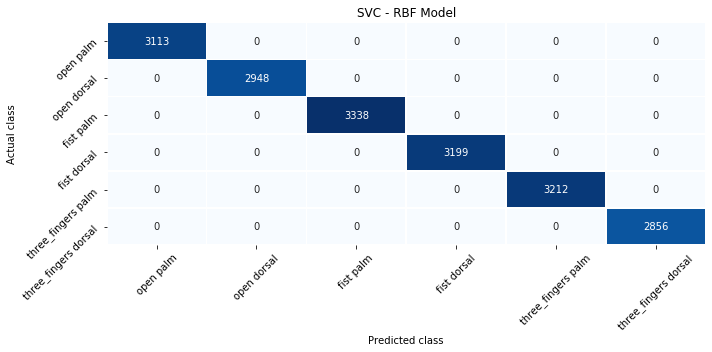

In [32]:
#cm = plot_confusion_matrix(svm, X_test, y_pred) # doctest: +SKIP
#plt.show()  # doctest: +SKIP
fig = plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred)#, labels= target_names)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
ax = plt.axes()
ax.set_title("SVC - RBF Model")
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")
ax.set_xticklabels(target_names,rotation=45)
ax.set_yticklabels(target_names,rotation=45)
fig.tight_layout() 
print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
print('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average= 'weighted')*100))
print('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average= 'weighted')*100))

In [30]:
target_names_1 = df1['merge_value_names']

In [31]:
target_names = target_names_1.unique()

## Classification Function

In [33]:
def classifier(clf, param, title):
    
    cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
    # Randomized grid search
    n_iter_search = 10
    gs = RandomizedSearchCV(clf, param_distributions = param, n_iter = n_iter_search,cv = cv, 
                            iid = False, scoring= 'accuracy')
    # Train model
    gs.fit(X_train, y_train)  
    print("The best parameters are %s" % (gs.best_params_)) 
    # Predict on test set
    y_pred = gs.best_estimator_.predict(X_test)
    # Get Probability estimates
    y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
    
    print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average= 'weighted')*100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average= 'weighted')*100))
    
    # Plot confusion matrix
    fig = plt.figure(figsize=(10, 5))
    cm = confusion_matrix(y_test, y_pred)#, labels= target_names)
    sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
    ax = plt.axes()
    ax.set_title(title)
    ax.set_xlabel("Predicted class")
    ax.set_ylabel("Actual class")
    ax.set_xticklabels(target_names,rotation=45)
    ax.set_yticklabels(target_names,rotation=45)
    fig.tight_layout()

## Logistic Regression

The best parameters are {'solver': 'newton-cg', 'penalty': 'l2'}
Accuracy score: 100.00%
Precision score: 100.00%
Recall score: 100.00%


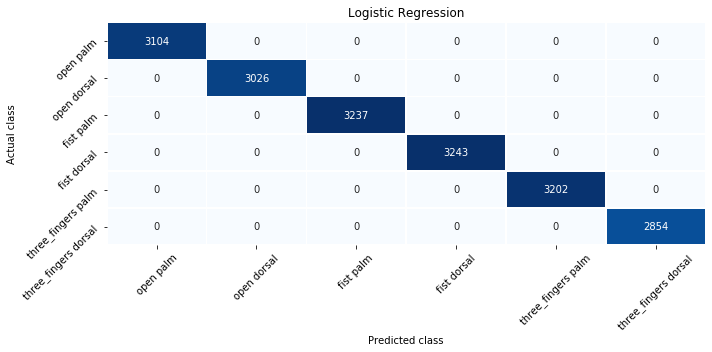

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

param = {'penalty': ['l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

classifier(lr, param, 'Logistic Regression')

## KNeighborsClassifier

The best parameters are {'weights': 'distance', 'n_neighbors': 13, 'leaf_size': 1, 'algorithm': 'auto'}
Accuracy score: 100.00%
Precision score: 100.00%
Recall score: 100.00%


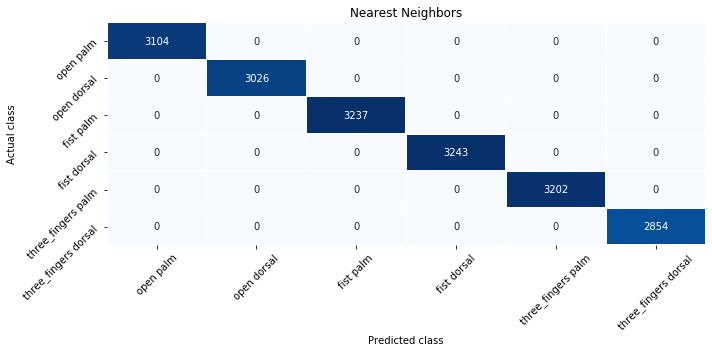

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param = {'n_neighbors': np.arange(1,15), 
             'weights': ['uniform', 'distance'],
             'leaf_size':[1, 3, 5],
             'algorithm':['auto', 'kd_tree']}

classifier(knn, param, 'Nearest Neighbors')

## GaussianNB

The best parameters are {'priors': None}
Accuracy score: 82.70%
Precision score: 73.85%
Recall score: 82.70%


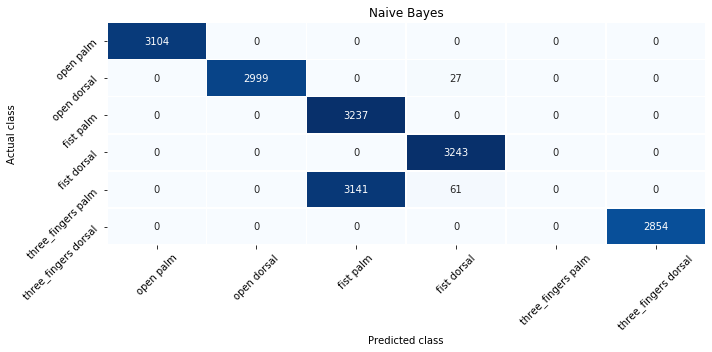

In [72]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

param = {'priors': [None]}

classifier(nb, param, 'Naive Bayes')

## SVC Linear

The best parameters are {'gamma': 1.0, 'C': 100.0}
Accuracy score: 100.00%
Precision score: 100.00%
Recall score: 100.00%


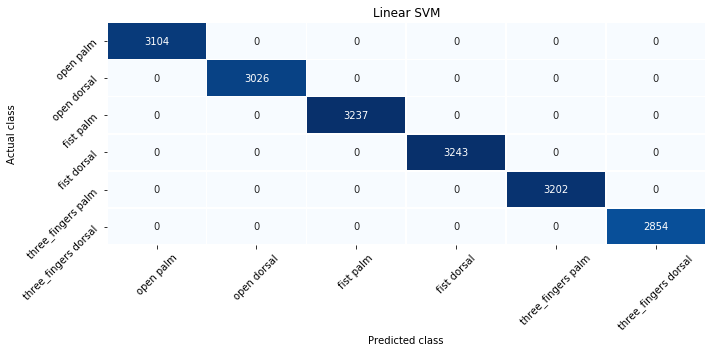

In [51]:
from sklearn.svm import SVC

svm_linear = SVC(kernel="linear", probability = True)

param = {'gamma': np.logspace(-2, 2, 5),
              'C': np.logspace(-2, 2, 5)}

classifier(svm_linear, param, 'Linear SVM')

## Decision Tree Classifier

The best parameters are {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 19, 'criterion': 'entropy'}
Accuracy score: 99.95%
Precision score: 99.95%
Recall score: 99.95%


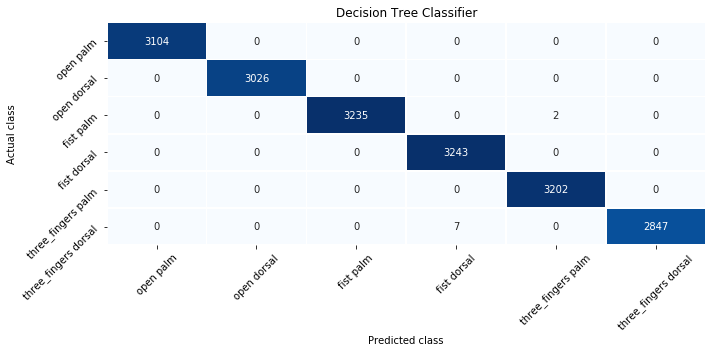

In [52]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

param = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(1, 20, 2),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'max_features': ['auto', 'sqrt', 'log2', None]}

classifier(dtree, param, "Decision Tree Classifier")

## RandomForestClassifier

The best parameters are {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'gini', 'bootstrap': True}
Accuracy score: 100.00%
Precision score: 100.00%
Recall score: 100.00%


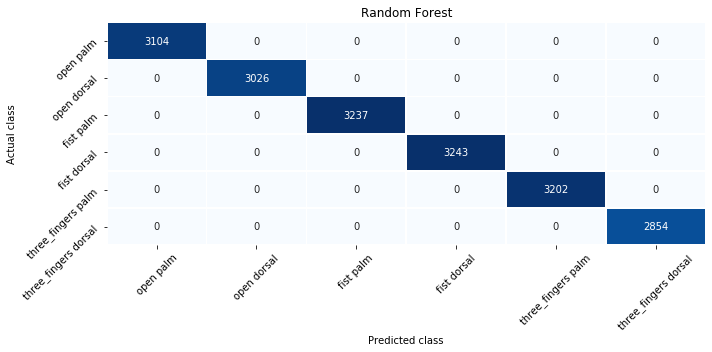

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param = {'n_estimators': [100, 200],
              'max_depth': [10, 20, 100, None],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

classifier(rf, param, 'Random Forest')

## Quadratic Discriminant Analysis

The best parameters are {'reg_param': 0.0, 'priors': None}
Accuracy score: 100.00%
Precision score: 100.00%
Recall score: 100.00%


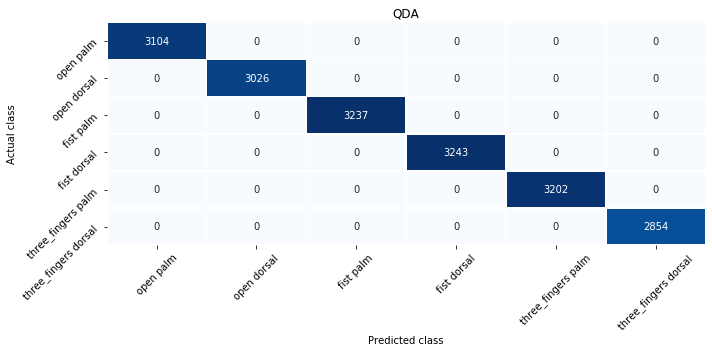

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

param = {'priors': [None], 
              'reg_param': np.arange(0., 1., 0.1)}

classifier(qda, param, "QDA")

## Multi Layer Perceptron Classifier

The best parameters are {'solver': 'adam', 'max_iter': 100, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 0.1, 'activation': 'identity'}
Accuracy score: 100.00%
Precision score: 100.00%
Recall score: 100.00%


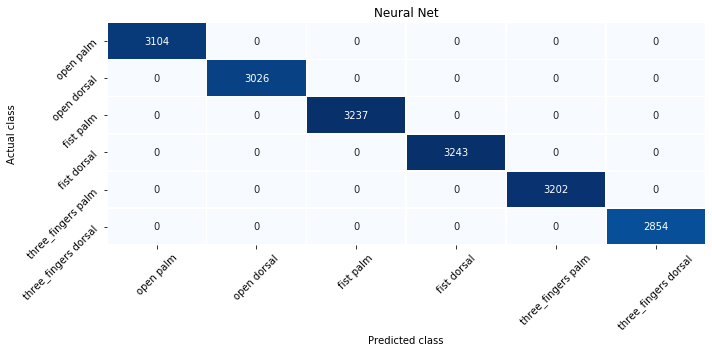

In [55]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

param = {'hidden_layer_sizes': [(10,), (50,), (10, 10), (50, 50)],
             'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'solver': ['lbfgs', 'sgd', 'adam'],
             'alpha': np.logspace(-5, 3, 5),
             'learning_rate': ['constant', 'invscaling','adaptive'],
             'max_iter': [100, 500, 1000]}

classifier(mlp, param, 'Neural Net')